In [2]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

### Constants

In [36]:
LOSSES_PATH = '../data/losses.pkl'
METRICS_PATH = '../data/metrics.pkl'
COLOR = '#e31c60'

In [18]:
losses = pd.read_pickle(open(LOSSES_PATH, 'rb'))[['epoch', 'looses', 'mean', 'std']]
metrics = pd.read_pickle(open(METRICS_PATH, 'rb'))[['epoch', 'class_accuracy', 'noobj_accuracy', 'obj_accuracy', 'map']]

### Analysis

#### Loss metrics

For this analysis, we will use the following metrics:
- [Binary Cross Entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a): used for not object loss.
- [Cross Entropy](https://towardsdatascience.com/an-intuitive-guide-how-entropy-connects-to-cross-entropy-78b0713494a9): used for class loss.
- [Mean Squared Error](https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958#:~:text=MSE%20is%20the%20average%20of,values%20and%20the%20predicted%20ones.&text=Then%20we%20take%20the%20average,data%20are%20of%20the%20population.): used for box loss (intersection over union) and coordinate loss (distance between two points)

In addition based on [YOLOv3 Loss calculation](https://towardsdatascience.com/calculating-loss-of-yolo-v3-layer-8878bfaaf1ff), we defined the following factors that signify how much to pay for each respective part of the loss:
- Class loss: 1
- No object loss: 10
- Object loss: 1
- Box loss (intersection and coordinates): 10

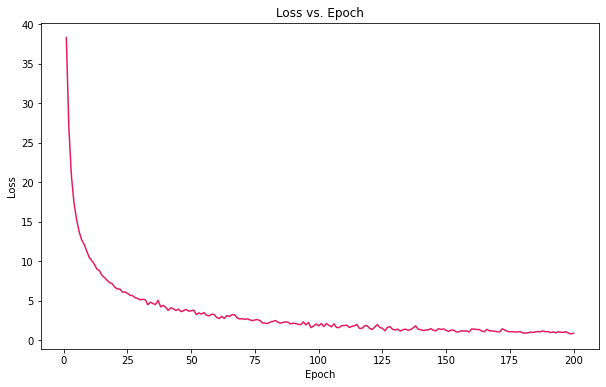

In [41]:
plt.figure(figsize=(10, 6))
loss_plot = sns.lineplot(x='epoch', y='mean', data=losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
loss_plot.lines[0].set_color(COLOR)
loss_plot.figure.savefig('../img/loss_plot.png', dpi=150)

#### Metrics analysis
- Class acurrary: total number of correct predictions divided by total number of predictions
- No object acurrary: total number of correct predictions divided by total number of predictions
- Object acurrary: total number of correct predictions divided by total number of predictions
- Map: average precision through 6 classes

In [27]:
for column in metrics.columns:
  metrics[column] = metrics[column].astype(float)

,epoch,class_accuracy,noobj_accuracy,obj_accuracy,map
0,3.0,21.588947,99.831352,0.690846,0.199696
1,6.0,25.877949,99.996170,0.302245,0.021215
2,9.0,29.763962,99.996437,0.964306,0.027495
3,12.0,35.463444,99.981972,5.325274,0.087721
4,15.0,41.983303,99.967773,14.263098,0.195057


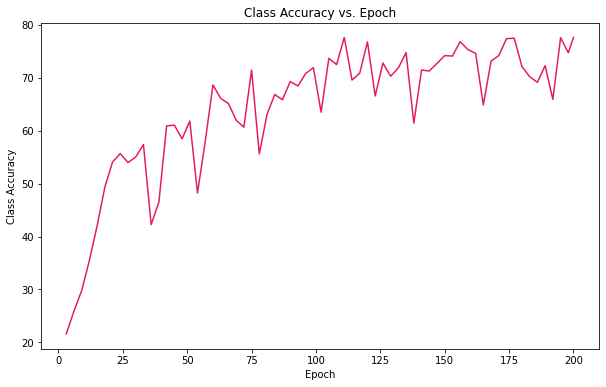

In [37]:
plt.figure(figsize=(10, 6))
ca_plot = sns.lineplot(x='epoch', y='class_accuracy', data=metrics)
plt.title('Class Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Class Accuracy')
#change line tu magenta
ca_plot.lines[0].set_color(COLOR)
ca_plot.figure.savefig('../img/ca_plot.png', dpi=150)


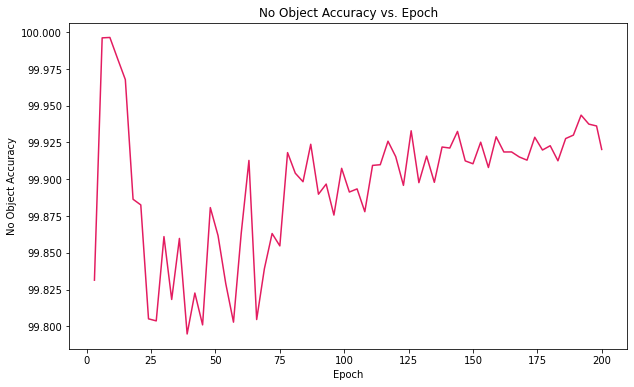

In [38]:
plt.figure(figsize=(10, 6))
noa_plot = sns.lineplot(x='epoch', y='noobj_accuracy', data=metrics)
plt.title('No Object Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('No Object Accuracy')
noa_plot.lines[0].set_color(COLOR)
noa_plot.figure.savefig('../img/noa_plot.png', dpi=150)

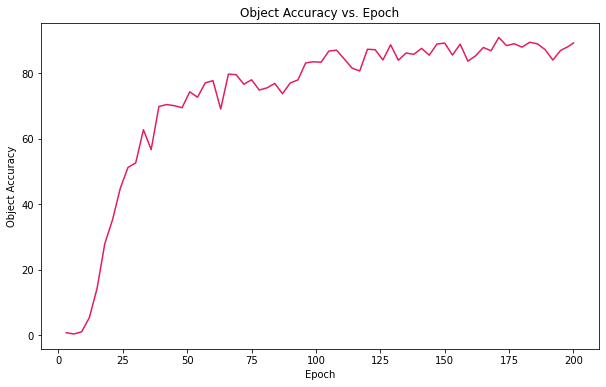

In [39]:
plt.figure(figsize=(10, 6))
oa_plot = sns.lineplot(x='epoch', y='obj_accuracy', data=metrics)
plt.title('Object Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Object Accuracy')
oa_plot.lines[0].set_color(COLOR)
oa_plot.figure.savefig('../img/oa_plot.png', dpi=150)